In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row', 150)
pd.set_option('display.max_seq_items',None)

%matplotlib inline

In [5]:
# load the data and map the data to x-y
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

In [16]:
#plot the data
plt.scatter(x[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

Text(0,0.5,u'Profit in $10,000')

In [17]:
def computeCost(x, y, theta=[[0],[0]]):
    m = y.size
    h = x.dot(theta)
    J = 1.0/(2*m)*np.sum(np.square(h-y))
    return J

In [18]:
computeCost(x, y)

32.072733877455676

In [27]:
def gradientDescent(x, y, theta=[[0],[0]], alpha=0.01, iters=1500):
    m = y.size
    J_history = np.zeros(iters)
    
    for iter in np.arange(iters):
        h = x.dot(theta)
        theta = theta - alpha*(1.0/m)*(x.T.dot(h-y))
        J_history[iter] = computeCost(x, y, theta)
    return theta, J_history

('theta: ', array([-3.63029144,  1.16636235]))


Text(0,0.5,u'Cost_J')

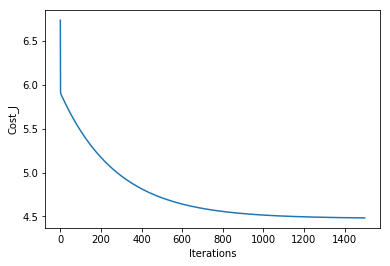

In [28]:
theta, Cost_J = gradientDescent(x, y)
print('theta: ', theta.ravel())

plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')

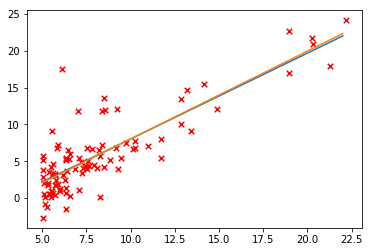

In [41]:
# Y = -3.63029144  + 1.16636235 * X
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

plt.scatter(x[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression(Gradient descent)')

# scikit-learn linear regression
regr = LinearRegression()
regr.fit(x[:,1].reshape(-1,1), y.ravel())
plt.plot(xx,regr.intercept_+regr.coef_*xx, label="Linear regression (scikit-learn)")


In [42]:
#Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1,3.5])*10000)
print(theta.T.dot([1,7])*10000)

[ 4519.7678677]
[ 45342.45012945]


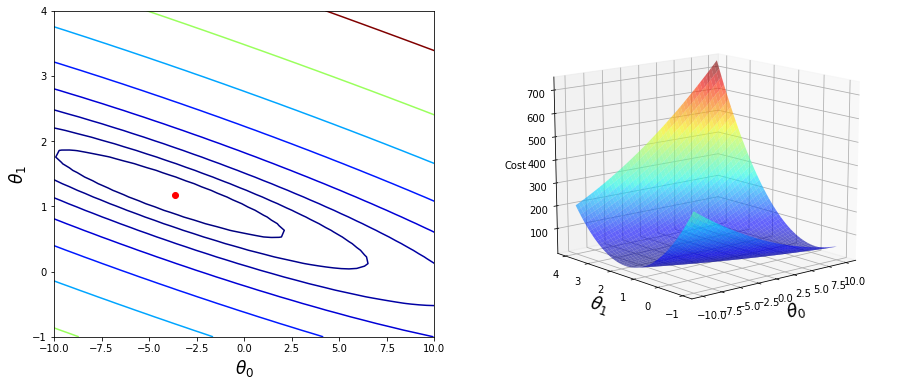

In [44]:
B0 = np.linspace(-10,10,50)
B1 = np.linspace(-1,4,50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
z = np.zeros((B0.size,B1.size))

for (i, j), v in np.ndenumerate(z):
    z[i,j] = computeCost(x, y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')


CS = ax1.contour(xx, yy, z, np.logspace(-2,3,20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')


ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(z.min(),z.max())
ax2.view_init(elev=15,azim=230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)